# Лабораторная работа №4

## Условие

Вариант №13

Распределения:

$$\mathbf{X} \sim R(-5, 5)$$
$$\mathbf{Y} \sim R(-5, 5)$$

Объём выборки:

$$ n = 300 $$


## Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  # для вывода формул в консоль
import pandas as pd

## Определения

In [2]:
a1, b1 = -5, 5
a2, b2 = -5, 5
n = 300
np.random.seed(42)


In [14]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))

np.random.seed(int(time()))

plt.rc("text", usetex=False)
plt.style.use("seaborn-v0_8")

In [15]:
def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table

In [16]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## 1. Исходные данные

In [17]:
X = np.random.uniform(a1, b1, n)
Y = np.random.uniform(a2, b2, n)

mprint(f"$X$: {X[:10].round(2)}")
mprint(f"$Y$: {Y[:10].round(2)}")


$X$: [-1.02 -2.04  3.51  1.36 -3.62 -0.74  3.46 -4.39  3.77 -4.25]

$Y$: [-0.99  2.77  4.16 -3.06 -1.22  4.88 -4.2  -3.97  1.28  1.55]

### Характеристики наблюдаемых случайных величин

| СВ             | Распределение | Параметры                 | Математическое ожидание, $m_i$                             | Дисперсия, $\sigma_i^2$                                                     | Объём выборки, $n_i$ |
| -------------- | ------------- | ------------------------- | ---------------------------------------------------------- | --------------------------------------------------------------------------- | -------------------- |
| $X$ | $R(-5, 5)$    | $a_1 = -5, b_1 = 5$       | $m_1 = \dfrac{a_1 + b_1}{2} = 0$                            | $\sigma_1^2 = \dfrac{(b_1 - a_1)^2}{12} = \dfrac{100}{12} = \dfrac{25}{3}$  | 300                  |
| $Y$ | $R(-5, 5)$    | $a_2 = -5, b_2 = 5$       | $m_2 = \dfrac{a_2 + b_2}{2} = 0$                            | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{100}{12} = \dfrac{25}{3}$  | 300                  |


### Выборочные характеристики

In [18]:
mean_X = X.mean()
S_X = X.var(ddof=1)

mean_Y = Y.mean()
S_Y = Y.var(ddof=1)

r_XY = stats.pearsonr(X, Y)[0]
rho_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(f"$\\overline{{x}} =$ {mean_X:.2f}, $s_X^2 =$ {S_X:.2f}")
mprint(f"$\\overline{{y}} =$ {mean_Y:.2f}, $s_Y^2 =$ {S_Y:.2f}")

mprint(
    f"$r_{{XY}} =$ {r_XY:.2f}, $\\rho_{{XY}} =$ {rho_XY:.2f}, $\\tau_{{XY}} =$ {tau_XY:.2f}"
)

$\overline{x} =$ 0.24, $s_X^2 =$ 8.09

$\overline{y} =$ -0.33, $s_Y^2 =$ 7.94

$r_{XY} =$ -0.02, $\rho_{XY} =$ -0.02, $\tau_{XY} =$ -0.01

| СВ | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | КК по Пирсону, $r_{XY}$ | КК по Спирмену, $\rho_{XY}$ | КК по Кендаллу, $\tau_{XY}$ |
| --- | --- | --- | --- | --- | --- |
| X | -0.05 | 8.66 | -0.10 | -0.11 | -0.07 |
| Y | 0.11 | 9.16 | -0.10 | -0.11 | -0.07 |


### Проверка значимости коэффициентов корреляции

In [19]:
z_r_XY = r_XY * sqrt(n - 2) / sqrt(1 - r_XY**2)
p_r_XY = stats.pearsonr(X, Y)[1]

z_rho_XY = rho_XY * sqrt(n - 2) / sqrt(1 - rho_XY**2)
p_rho_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * sqrt(9 * n * (n + 1)) / sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $r_{XY}$",
    f"$H_0$: $r_{{XY}} = 0$, $H_1$: $r_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_r_XY:.2f}, ",
    f"$p =$ {p_r_XY:.2f}",
    verdict(alpha, p_r_XY),
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $r_{XY}$

$H_0$: $r_{XY} = 0$, $H_1$: $r_{XY} \neq 0$

$z_{выб} =$ -0.32, 

$p =$ 0.75

$H_0$ принимается

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ -0.39, 

$p =$ 0.69

$H_0$ принимается

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ -0.37, 

$p =$ 0.71

$H_0$ принимается

| Статистическая гипотеза, $H_0$                 | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ---------------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| $H_0:\ r_{XY} = 0 \\H_1:\ r_{XY} \neq 0$       | 0.73      | $H_0$ принимается                          | Нет                            |
| $H_0:\ \rho_{XY} = 0 \\H_1:\ \rho_{XY} \neq 0$ | 0.97      | $H_0$ принимается                          | Нет                            |
| $H_0:\ \tau_{XY} = 0 \\H_1:\ \tau_{XY} \neq 0$ | 0.94      | $H_0$ принимается                          | Нет                            |


## 2. Визуальное представление двумерной выборки

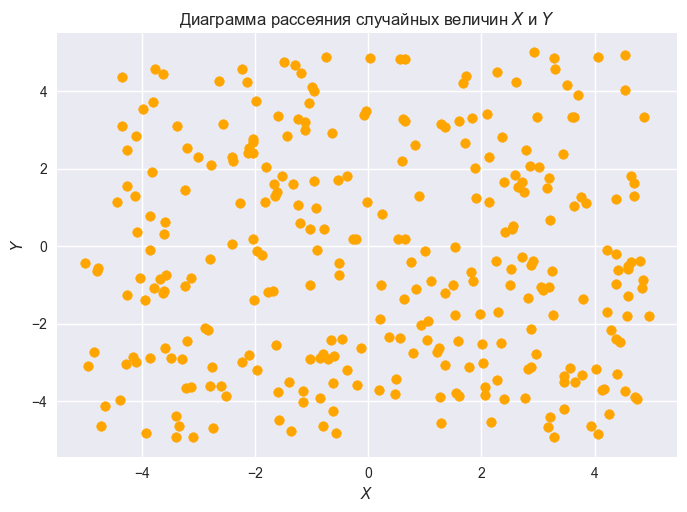

In [20]:
plt.scatter(X, Y, color="orange")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.title(r"Диаграмма рассеяния случайных величин $X$ и $Y$")
plt.show()

## 3. Проверка независимости методом таблиц сопряженности

Статистическая гипотеза: $H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y); \quad H':\ \exists i, j: F_Y(y \mid X \in \Delta_i) \neq F_Y(y \mid X \in \Delta_j)$

### Эмпирическая таблица сопряженности

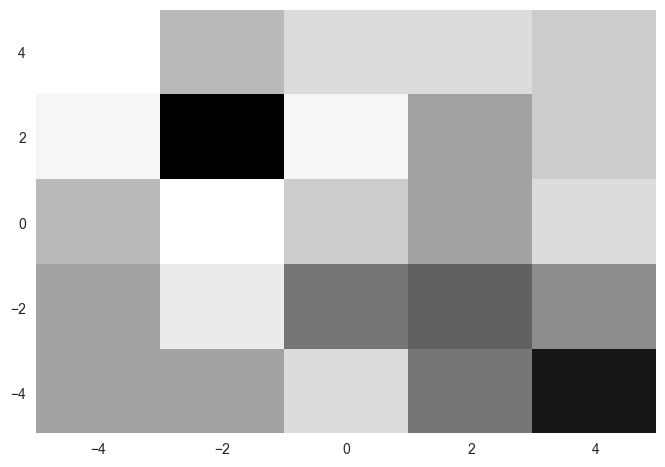

In [45]:
k = 5

emperical_table, bin_edges_X, bin_edges_Y, _ = plt.hist2d(X, Y, bins=k)

In [46]:
columns = [f"[{bin_edges_Y[i]:.2f}, {bin_edges_Y[i+1]:.2f})" for i in range(k - 1)] + [
    f"[{bin_edges_Y[-2]:.2f}, {bin_edges_Y[-1]:.2f}]"
]
indexes = [
    f"Δ{i+1} = [{bin_edges_X[i]:.2f}, {bin_edges_X[i+1]:.2f})"
    for i in range(k - 1)
] + [f"Δ{k} = [{bin_edges_X[-2]:.2f}, {bin_edges_X[-1]:.2f}]"]

emperical_table = pd.DataFrame(
    emperical_table,
    columns=pd.Index(columns, name="Y"),
    index=pd.Index(indexes, name="X"),
)
emperical_table

Y,"[-4.93, -2.95)","[-2.95, -0.96)","[-0.96, 1.02)","[1.02, 3.01)","[3.01, 4.99]"
X,,,,,
"Δ1 = [-5.00, -3.01)",13.0,13.0,12.0,8.0,7.0
"Δ2 = [-3.01, -1.01)",13.0,9.0,7.0,20.0,12.0
"Δ3 = [-1.01, 0.98)",10.0,15.0,11.0,8.0,10.0
"Δ4 = [0.98, 2.97)",15.0,16.0,13.0,13.0,10.0
"Δ5 = [2.97, 4.96]",19.0,14.0,10.0,11.0,11.0


In [47]:
print(dataframe_to_markdown(emperical_table))

| X\Y | [-4.93, -2.95) | [-2.95, -0.96) | [-0.96, 1.02) | [1.02, 3.01) | [3.01, 4.99] |
|---|---|---|---|---|---|
| Δ1 = [-5.00, -3.01) | 13.0 | 13.0 | 12.0 | 8.0 | 7.0 |
| Δ2 = [-3.01, -1.01) | 13.0 | 9.0 | 7.0 | 20.0 | 12.0 |
| Δ3 = [-1.01, 0.98) | 10.0 | 15.0 | 11.0 | 8.0 | 10.0 |
| Δ4 = [0.98, 2.97) | 15.0 | 16.0 | 13.0 | 13.0 | 10.0 |
| Δ5 = [2.97, 4.96] | 19.0 | 14.0 | 10.0 | 11.0 | 11.0 |



| X\Y | [-4.93, -2.95) | [-2.95, -0.96) | [-0.96, 1.02) | [1.02, 3.01) | [3.01, 4.99] |
|---|---|---|---|---|---|
| Δ1 = [-5.00, -3.01) | 13.0 | 13.0 | 12.0 | 8.0 | 7.0 |
| Δ2 = [-3.01, -1.01) | 13.0 | 9.0 | 7.0 | 20.0 | 12.0 |
| Δ3 = [-1.01, 0.98) | 10.0 | 15.0 | 11.0 | 8.0 | 10.0 |
| Δ4 = [0.98, 2.97) | 15.0 | 16.0 | 13.0 | 13.0 | 10.0 |
| Δ5 = [2.97, 4.96] | 19.0 | 14.0 | 10.0 | 11.0 | 11.0 |


### Теоретическая таблица сопряженности

In [52]:
V1 = emperical_table.sum(axis=1).values
V1 = np.atleast_2d(V1).T
V1

array([[53.],
       [61.],
       [54.],
       [67.],
       [65.]])

In [53]:
V2 = emperical_table.sum(axis=0).values
V2 = np.atleast_2d(V2)
V2

array([[70., 67., 53., 60., 50.]])

In [54]:
theoretical_table = pd.DataFrame(
    np.dot(V1, V2) / n,
    columns=pd.Index(columns, name="Y"),
    index=pd.Index(indexes, name="X"),
)
theoretical_table

Y,"[-4.93, -2.95)","[-2.95, -0.96)","[-0.96, 1.02)","[1.02, 3.01)","[3.01, 4.99]"
X,,,,,
"Δ1 = [-5.00, -3.01)",12.366667,11.836667,9.363333,10.6,8.833333
"Δ2 = [-3.01, -1.01)",14.233333,13.623333,10.776667,12.2,10.166667
"Δ3 = [-1.01, 0.98)",12.600000,12.060000,9.540000,10.8,9.000000
"Δ4 = [0.98, 2.97)",15.633333,14.963333,11.836667,13.4,11.166667
"Δ5 = [2.97, 4.96]",15.166667,14.516667,11.483333,13.0,10.833333


In [55]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | [-4.93, -2.95) | [-2.95, -0.96) | [-0.96, 1.02) | [1.02, 3.01) | [3.01, 4.99] |
|---|---|---|---|---|---|
| Δ1 = [-5.00, -3.01) | 12.37 | 11.84 | 9.36 | 10.6 | 8.83 |
| Δ2 = [-3.01, -1.01) | 14.23 | 13.62 | 10.78 | 12.2 | 10.17 |
| Δ3 = [-1.01, 0.98) | 12.6 | 12.06 | 9.54 | 10.8 | 9.0 |
| Δ4 = [0.98, 2.97) | 15.63 | 14.96 | 11.84 | 13.4 | 11.17 |
| Δ5 = [2.97, 4.96] | 15.17 | 14.52 | 11.48 | 13.0 | 10.83 |



| X\Y | [-4.93, -2.95) | [-2.95, -0.96) | [-0.96, 1.02) | [1.02, 3.01) | [3.01, 4.99] |
|---|---|---|---|---|---|
| Δ1 = [-5.00, -3.01) | 12.37 | 11.84 | 9.36 | 10.6 | 8.83 |
| Δ2 = [-3.01, -1.01) | 14.23 | 13.62 | 10.78 | 12.2 | 10.17 |
| Δ3 = [-1.01, 0.98) | 12.6 | 12.06 | 9.54 | 10.8 | 9.0 |
| Δ4 = [0.98, 2.97) | 15.63 | 14.96 | 11.84 | 13.4 | 11.17 |
| Δ5 = [2.97, 4.96] | 15.17 | 14.52 | 11.48 | 13.0 | 10.83 |

### Проверка статистической гипотезы

In [56]:
res = stats.chi2_contingency(emperical_table)
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    r"$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
    verdict(alpha, p),
)

### $\chi^2$-test

$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$

$z_{выб} =$ 14.37

$p =$ 0.57

$H_0$ принимается

| Выборочное значение статистики критерия | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| 14.37                                   | 0.57      | $H_0$ принимается                          | Нет                            |


## 4. Исследование корреляционной связи

Случайная величина $U = \lambda X + (1 - \lambda)Y,\ \lambda \in [0;1]$

Случайная величина $V = \lambda X^3 + (1 - \lambda)Y^3,\ \lambda \in [0;1]$

In [57]:
lambdas = np.linspace(0, 1, 10000)

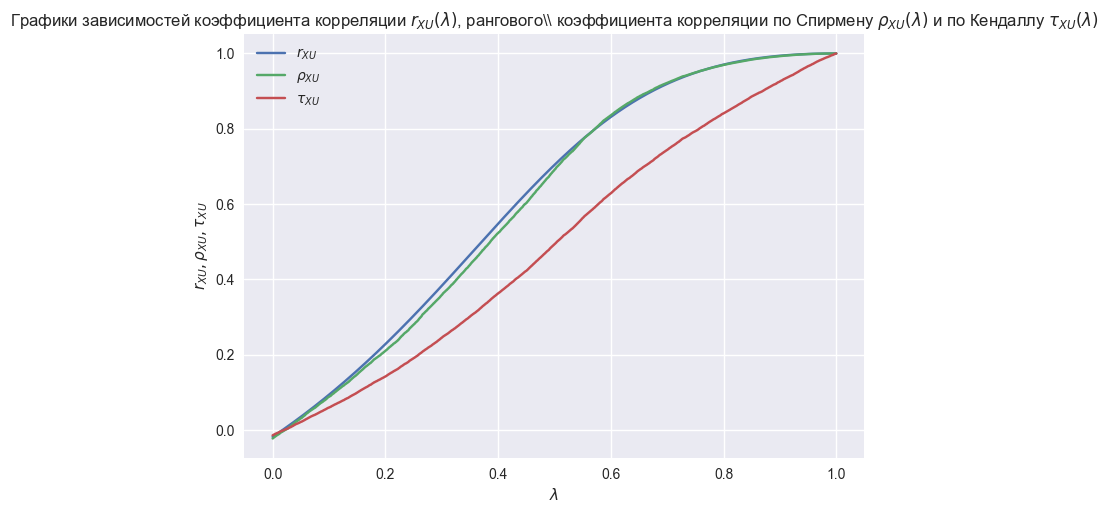

In [58]:
r_XU = []
rho_XU = []
tau_XU = []

for l in lambdas:
    U = l * X + (1 - l) * Y
    r_XU += [stats.pearsonr(X, U)[0]]
    rho_XU += [stats.spearmanr(X, U)[0]]
    tau_XU += [stats.kendalltau(X, U)[0]]

plt.plot(lambdas, r_XU, label=r"$r_{XU}$")
plt.plot(lambdas, rho_XU, label=r"$\rho_{XU}$")
plt.plot(lambdas, tau_XU, label=r"$\tau_{XU}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XU}, \rho_{XU}, \tau_{XU}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XU}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XU}(\lambda)$ и по Кендаллу $\tau_{XU}(\lambda)$"
)
plt.legend()
plt.show()

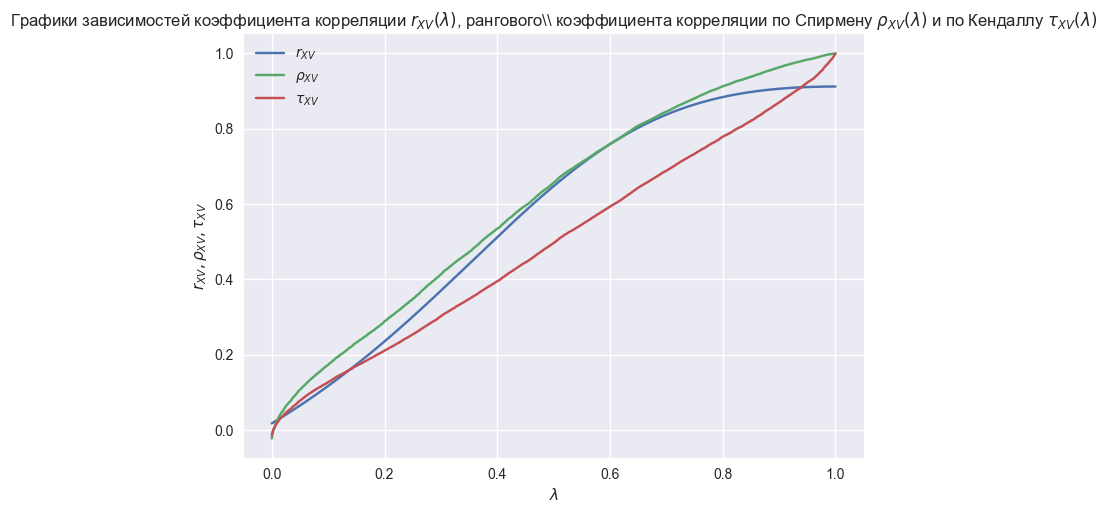

In [59]:
r_XV = []
rho_XV = []
tau_XV = []

for l in lambdas:
    V = l * X**3 + (1 - l) * Y**3
    r_XV += [stats.pearsonr(X, V)[0]]
    rho_XV += [stats.spearmanr(X, V)[0]]
    tau_XV += [stats.kendalltau(X, V)[0]]

plt.plot(lambdas, r_XV, label=r"$r_{XV}$")
plt.plot(lambdas, rho_XV, label=r"$\rho_{XV}$")
plt.plot(lambdas, tau_XV, label=r"$\tau_{XV}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XV}, \rho_{XV}, \tau_{XV}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XV}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XV}(\lambda)$ и по Кендаллу $\tau_{XV}(\lambda)$"
)
plt.legend()
plt.show()

Выводы:

По первому графику: при $\lambda \to 0$ все коэффициенты корреляции стремятся к 0, что свидетельствует об отсутствии линейной корреляционной связи между случайными величинами $X$ и $U$. При $\lambda \to 1$ все коэффициенты корреляции стремятся к 1, что свидетельствует о наличии линейной функциональной зависимости между случайными величинами $X$ и $U$.

По второму графику: $r_{XV}$ никогда не принимает значений 1, что свидетельствует об отсутствии линейной функциональной зависимости между случайными величинами $X$ и $V$. Однако при $\lambda \to 1$ коэффициенты корреляции $\rho_{XV}, \tau_{XV} \to 1$, что свидетельствует о наличии монотонной функциональной зависимости между случайными величинами $X$ и $V$. При $\lambda \to 0$ коэффициенты корреляции $r_{XV}, \rho_{XV}, \tau_{XV}$ близки к 0, что свидетельствует об отсутствии линейной и даже монотонной корреляционной связи между случайными величинами $X$ и $V$. 

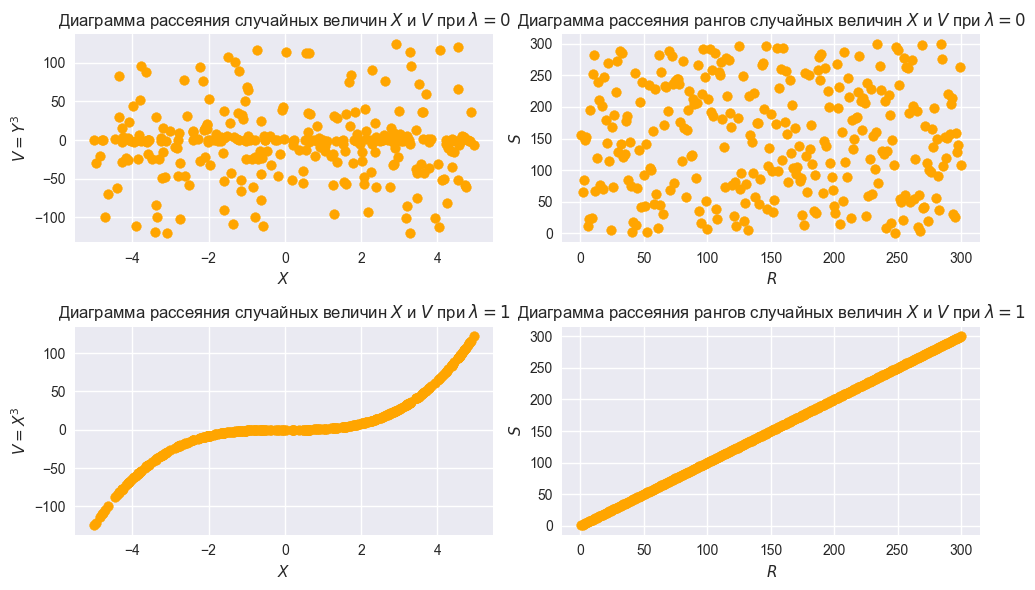

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].scatter(X, Y**3, color="orange")
axes[0, 0].set_xlabel(r"$X$")
axes[0, 0].set_ylabel(r"$V = Y^3$")
axes[0, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[0, 1].scatter(stats.rankdata(X), stats.rankdata(Y**3), color="orange")
axes[0, 1].set_xlabel(r"$R$")
axes[0, 1].set_ylabel(r"$S$")
axes[0, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[1, 0].scatter(X, X**3, color="orange")
axes[1, 0].set_xlabel(r"$X$")
axes[1, 0].set_ylabel(r"$V = X^3$")
axes[1, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 1$"
)

axes[1, 1].scatter(stats.rankdata(X), stats.rankdata(X**3), color="orange")
axes[1, 1].set_xlabel(r"$R$")
axes[1, 1].set_ylabel(r"$S$")
axes[1, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 1$"
)

plt.tight_layout()
plt.show()

Выводы:

Если $X$ и $V$ независимы, то и их ранги $R$ и $S$ также будут независимыми. 

Если $V = \varphi(X)$, $\varphi$ - монотонная функция, то переход к рангам "выпрямляет" монотонную зависимость исходных признаков.